# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\ANAND\Downloads\Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Basic understanding of the dataset

In [4]:
df.shape

(500, 8)

In [5]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Visualizing Data(Correlation)

In [7]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

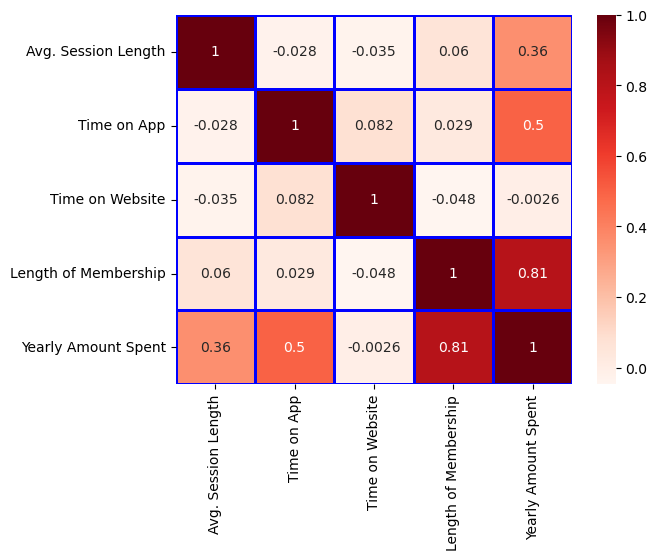

In [8]:
sns.heatmap(df.corr(), cmap='Reds',annot=True, linecolor='Blue', linewidths=1.0)

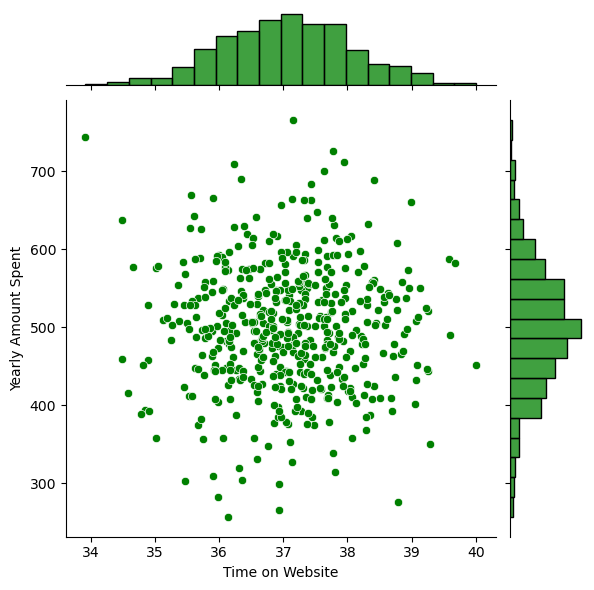

In [9]:
sns.jointplot(x=df['Time on Website'],
              y=df['Yearly Amount Spent'],
             data=df,color='g')

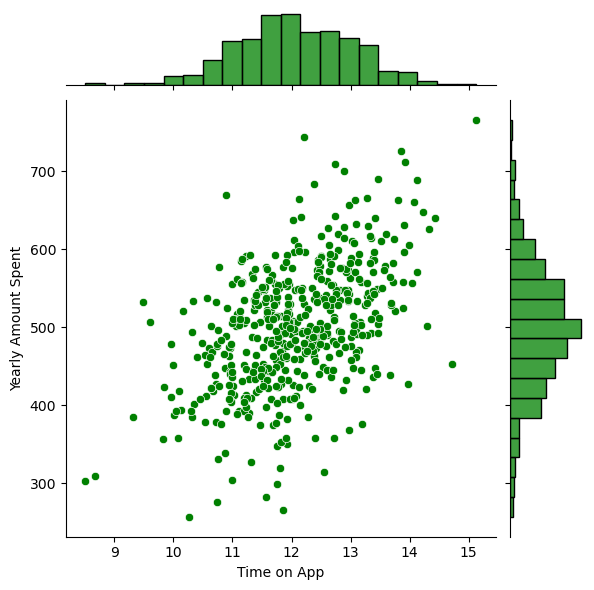

In [10]:
sns.jointplot(x=df['Time on App'],
              y=df['Yearly Amount Spent'],
             data=df,color='g')

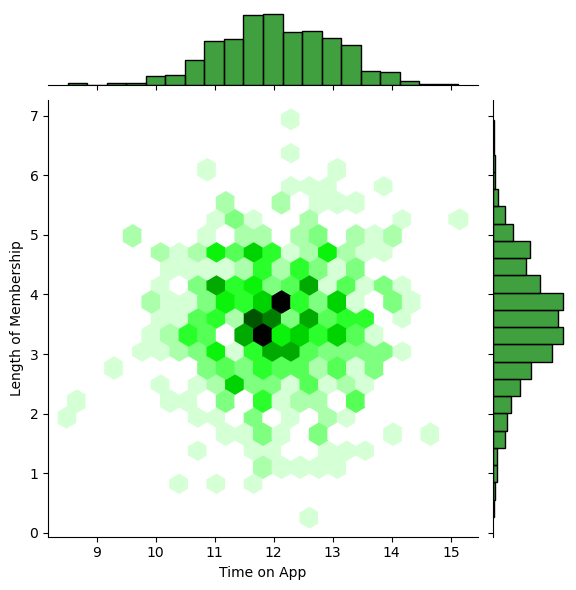

In [11]:
sns.jointplot(x=df['Time on App'],
              y=df['Length of Membership'],
              data=df,
              kind='hex',
              color='g')

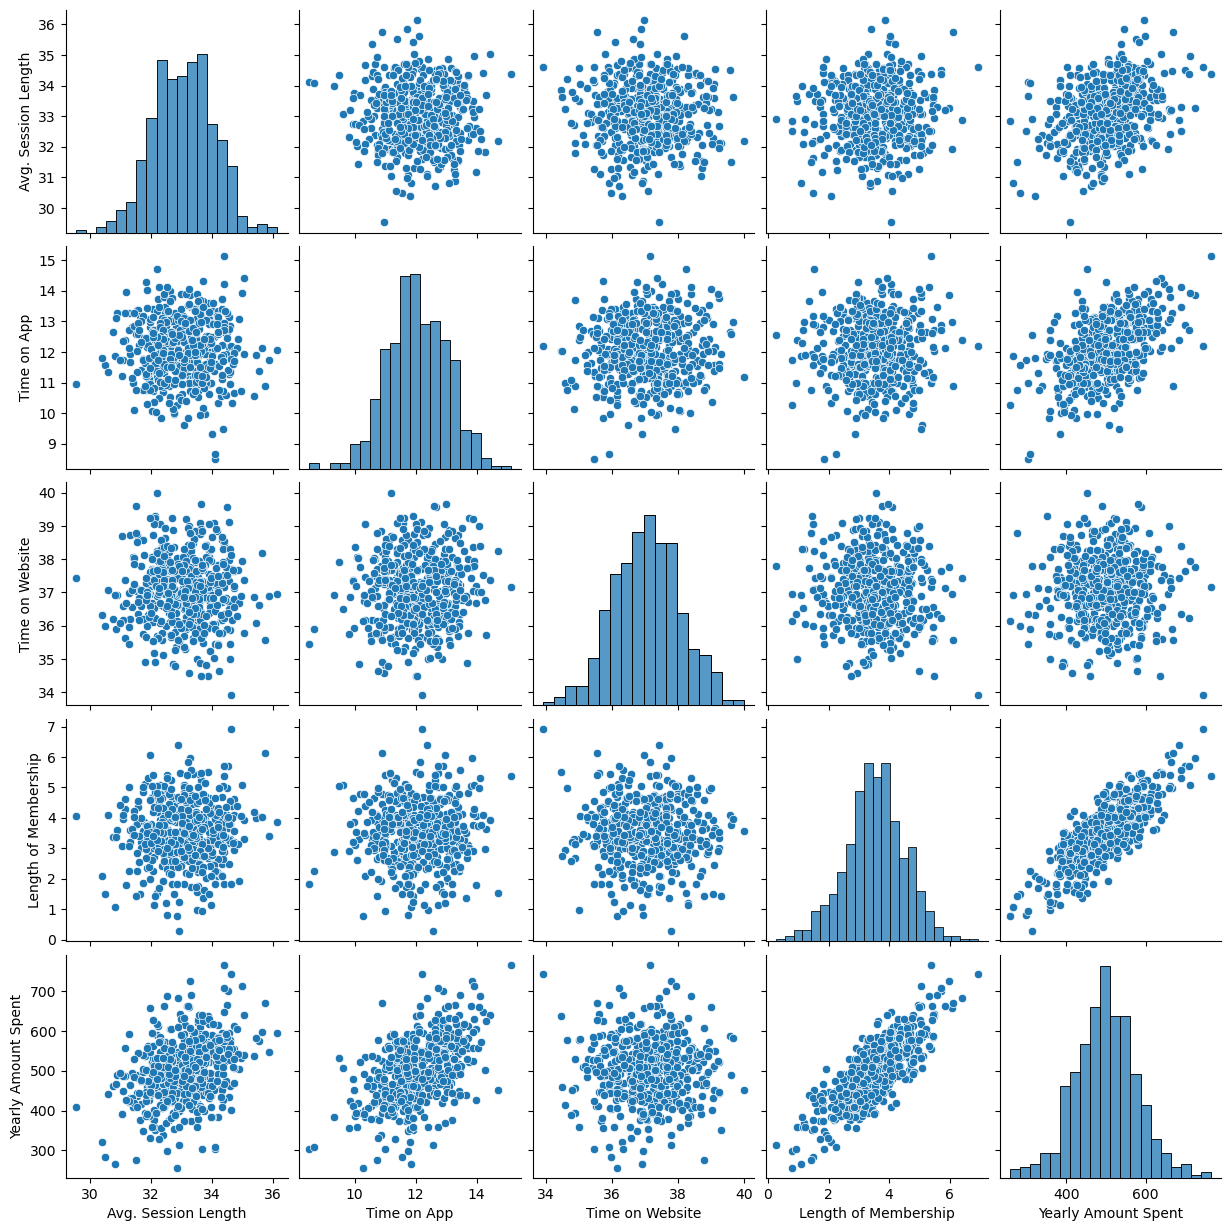

In [12]:
sns.pairplot(df)

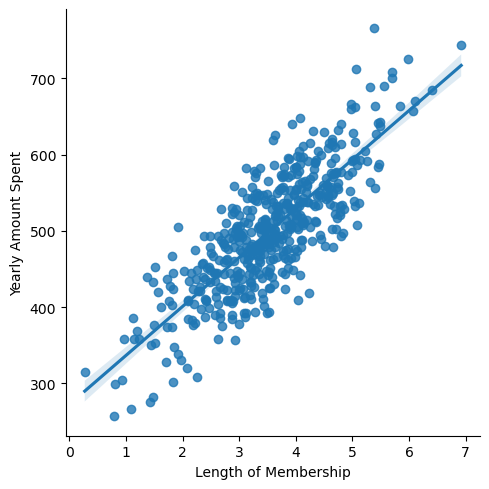

In [13]:
sns.lmplot(x='Length of Membership',
          y='Yearly Amount Spent',
          data= df)

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

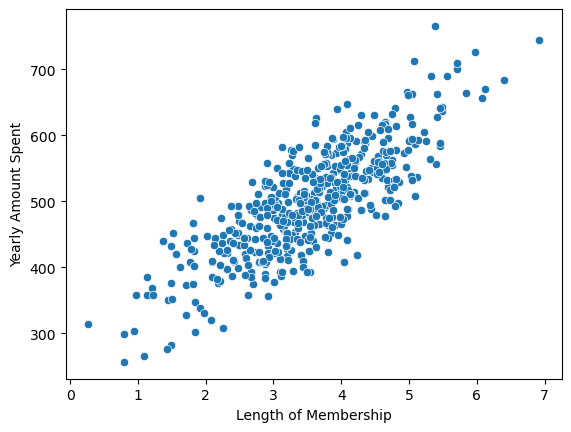

In [14]:
sns.scatterplot(x=df['Length of Membership'],
               y=df['Yearly Amount Spent'],
               data=df)

In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Machine Learning Algorithm Part
## Separating the dataset into features and target data

In [16]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [17]:
y = df['Yearly Amount Spent']

# feature data

In [18]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


# target data

In [21]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

# Model Selection for ML
## Separating the data into Training and Test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Applying the model to the data and training the model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
lm.coef_


array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [22]:
lm.intercept_


-1047.932782250239

# Testing the model

In [23]:
predictions = lm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

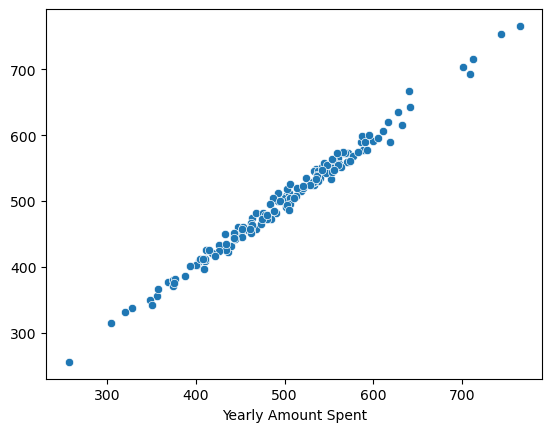

In [24]:
sns.scatterplot(y_test,predictions)

# Evaluating the model

In [25]:
from sklearn import metrics

In [26]:
print(
    f'''
MAE: {metrics.mean_absolute_error(y_test,predictions)}
MSE: {metrics.mean_squared_error(y_test,predictions)}
RMSE: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}
    ''')


MAE: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633
    


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

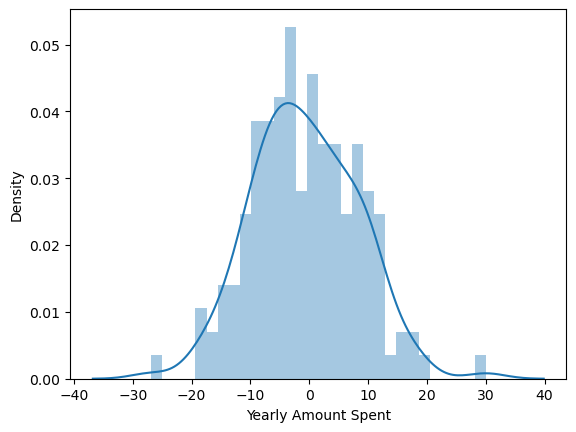

In [27]:
sns.distplot(y_test-predictions,bins=30)

In [28]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [29]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
pd.DataFrame(lm.coef_,
            ['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'],
            columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
